# Le pendule

## Modélisation

### Approximation des petits angles

On considère le pendule simple, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

Résolvons cette équation linéarisée ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et tracez **sur un même graphe** l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

Commencons par car définir le système de 2 équations différentielles du premier ordre à partir de l'équation différentielle du second ordre.

On pose:
$$
\begin{align*}
\theta_{1} & = \theta \\
\theta_{2} & = \frac{\mathrm{d}\theta}{\mathrm{d}t}
\end{align*}
$$

On a donc le système d'équations différentielles suivant :
$$
\begin{align*}
\frac{\mathrm{d}\theta_{1}}{\mathrm{d}t} & = \theta_{2} \\
\frac{\mathrm{d}\theta_{2}}{\mathrm{d}t} & = -q\theta_{2}-\Omega^{2}\theta_{1} 
\end{align*}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [4]:
def rk4(func: Callable, t_i: float, v_i: float, step: float):
    """
        Méthode de Runge-Kutta d'ordre 4 pour une étape de temps donnée.
        :param func: Fonction à dériver
        :param t_i: Temps à l'instant i
        :param v_i: Valeur de la fonction à l'instant i
        :param step: Pas de temps
        :return: Nouvelle valeur après application de la méthode RK4
    """
    k1 = func(t_i, v_i)
    k2 = func(t_i + step / 2, v_i + step / 2 * k1)
    k3 = func(t_i + step / 2, v_i + step / 2 * k2)
    k4 = func(t_i + step, v_i + step * k3)
    return v_i + (step / 6) * (k1 + 2 * k2 + 2 * k3 + k4)


In [5]:

def euler(start, end, step, v_ini: tuple, system: Callable):
    '''
        Méthode d'Euler pour la résolution d'un système d'équations différentielles
        start : float : Temps de début
        end : float : Temps de fin
        step : float : Pas de temps
        v_ini : tuple : Conditions initiales
        system : function : Système d'équations différentielles
        return : tuple : (t, v) : tableau temps et tableau de solution
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((len(v_ini), num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        # Calcul de la valeur suivante
        v[:, i + 1] = rk4(system, t[i], v[:, i], step)

    # Argument de sortie
    return t, v

In [6]:
q = 1

In [7]:
def system(t_i, v_i, w=1):
    """
        Système d'équations différentielles pour le pendule simple
        :param t_i: Temps à l'instant i
        :param v_i: Valeur de la fonction à l'instant i
        :return: Dérivée de la fonction
    """
    global q
    dv = np.zeros_like(v_i)
    dv[0] = v_i[1]
    dv[1] = - q * v_i[1] - w**2 * v_i[0]
    return dv

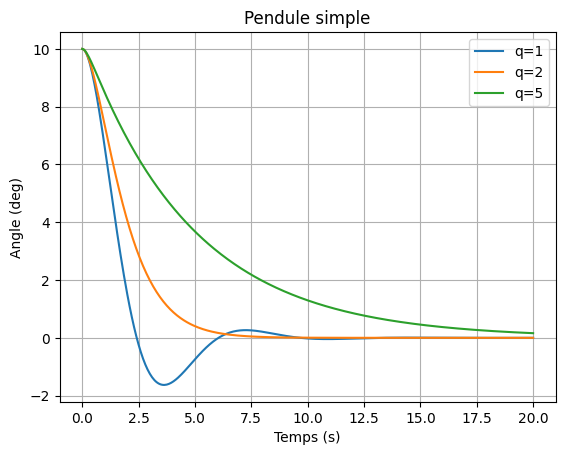

In [8]:
for q_ in [1, 2, 5]:
    # Paramètres
    start = 0
    end = 20
    step = 0.05

    # Conditions initiales
    v_ini = (np.deg2rad(10), 0)
    global q
    q = q_

    # Résolution du système d'équations différentielles
    t, v = euler(start, end, step, v_ini, system)

    # Affichage des résultats
    plt.plot(t, np.rad2deg(v[0]), label=f'q={q}')
    plt.title('Pendule simple')
    plt.xlabel('Temps (s)')
    plt.ylabel('Angle (deg)')
    plt.legend()
    plt.grid()
plt.show()

## Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Résolvez cette nouvelle équation avec la méthode RK4 pour une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.

Tracez **sur un même graphe** la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Commentez la forme des trajectoires que vous observez.

Comme pour la question précédente, on définit le système de 2 équations différentielles du premier ordre à partir de l'équation différentielle du second ordre.

On pose:
$$
\begin{align*}
\theta_{1} & = \theta \\
\theta_{2} & = \frac{\mathrm{d}\theta}{\mathrm{d}t}
\end{align*}
$$
On a donc le système d'équations différentielles suivant :
$$
\begin{align*}
\frac{\mathrm{d}\theta_{1}}{\mathrm{d}t} & = \theta_{2} \\
\frac{\mathrm{d}\theta_{2}}{\mathrm{d}t} & = -q\theta_{2}-\Omega^{2}\theta_{1}+F_e\sin(\Omega_e t)
\end{align*}
$$

In [9]:
q = 1
f_e = 0

In [10]:
def system(t_i, v_i, w=1, w_e=2/3):
    """
        Système d'équations différentielles pour le pendule simple
        :param t_i: Temps à l'instant i
        :param v_i: Valeur de la fonction à l'instant i
        :return: Dérivée de la fonction
    """
    global q, f_e
    dv = np.zeros_like(v_i)
    dv[0] = v_i[1]
    dv[1] = - q * v_i[1] - w**2 * v_i[0] + f_e * np.sin(w_e * t_i)
    return dv

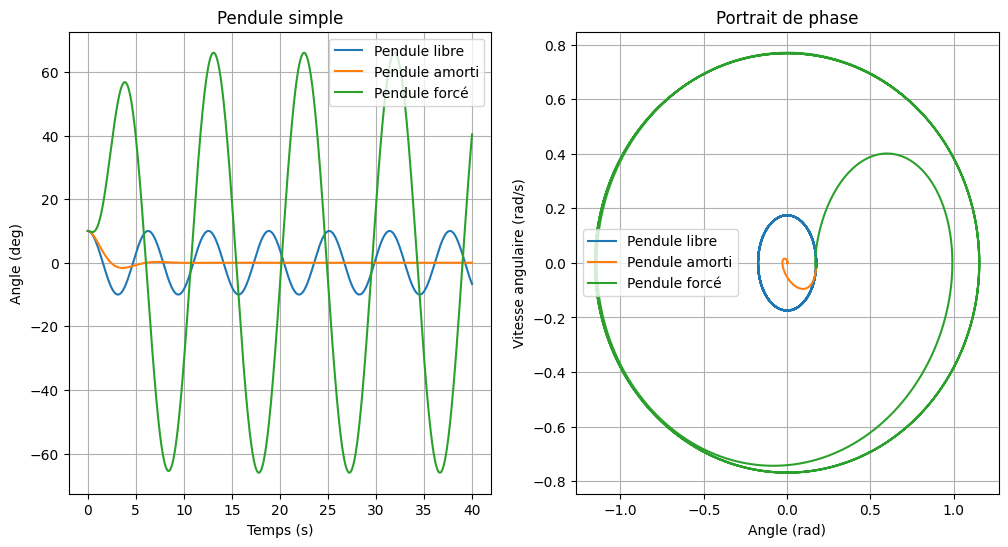

In [11]:
titles = ['Pendule libre', "Pendule amorti", "Pendule forcé"]
params = [(0,0), (1,0), (1, 1)]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for title, param in zip(titles, params):
    q_, f_e_ = param
    # Paramètres
    start = 0
    end = 40
    step = 0.05

    # Conditions initiales
    v_ini = (np.deg2rad(10), 0)
    global q, f_e
    q = q_
    f_e = f_e_

    # Résolution du système d'équations différentielles
    t, v = euler(start, end, step, v_ini, system)

    # Affichage des résultats
    axes[0].plot(t, np.rad2deg(v[0]), label=title)
    axes[1].plot(v[0], v[1], label=title)
axes[0].set_title('Pendule simple')
axes[0].set_xlabel('Temps (s)')
axes[0].set_ylabel('Angle (deg)')
axes[0].legend()
axes[0].grid()

axes[1].set_title('Portrait de phase')
axes[1].set_xlabel('Angle (rad)')
axes[1].set_ylabel('Vitesse angulaire (rad/s)')
axes[1].legend()
axes[1].grid()
plt.show()

Le pendule forcé oscille à la fréquence de la force d'excitation. On peut donc s'attendre à ce que le pendule résonne lorsque la fréquence de la force d'excitation est proche de la fréquence propre du pendule.
De plus on remarque que la force d'excitation et l'amortissement se compense rapidement pour stabilier le pendule.
Faire l'approximation des petits angles semble plus difficile maintenant qu'on a des angle pour le pendule forcé de plus de 50°.

Le diagramme de phase montre bien que la vitessse du pendule avec excitation est plus grande que celle du pendule amorti et du pendule libre et que la maximal vitesse se stabilise après quelques oscillations.

## Mouvement chaotique

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

Résolvez l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Tracez $\theta(t)$ sur un temps de $100\mathrm{~s}$.

Ajoutez deux tests `if` dans la boucle après l'appel à rk4 pour maintenir l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$.

Que constatez-vous au sujet de la période du pendule ? (Attention, périodique $\neq$ sinusoïdal...)

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

In [12]:
# Fix RK4
def rk4(func: Callable, t_i: float, v_i: float, step: float):
    """
        Méthode de Runge-Kutta d'ordre 4 pour une étape de temps donnée.
        :param func: Fonction à dériver
        :param t_i: Temps à l'instant i
        :param v_i: Valeur de la fonction à l'instant i
        :param step: Pas de temps
        :return: Nouvelle valeur après application de la méthode RK4
    """
    k1 = func(t_i, v_i)
    k2 = func(t_i + step / 2, v_i + step / 2 * k1)
    k3 = func(t_i + step / 2, v_i + step / 2 * k2)
    k4 = func(t_i + step, v_i + step * k3)
    angle = v_i + (step / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    if angle[0] > np.pi:
        angle[0] -= 2 * np.pi
    if angle[0] < -np.pi:
        angle[0] += 2 * np.pi
    return angle

def euler(start, end, step, v_ini: tuple, system: Callable):
    '''
        Méthode d'Euler pour la résolution d'un système d'équations différentielles
        start : float : Temps de début
        end : float : Temps de fin
        step : float : Pas de temps
        v_ini : tuple : Conditions initiales
        system : function : Système d'équations différentielles
        return : tuple : (t, v) : tableau temps et tableau de solution
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((len(v_ini), num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        # Calcul de la valeur suivante
        v[:, i + 1] = rk4(system, t[i], v[:, i], step)

    # Argument de sortie
    return t, v

In [13]:
q = 0.5

def system(t_i, v_i, w=1, w_e=2/3):
    """
        Système d'équations différentielles pour le pendule simple
        :param t_i: Temps à l'instant i
        :param v_i: Valeur de la fonction à l'instant i
        :return: Dérivée de la fonction
    """
    global q, f_e
    dv = np.zeros_like(v_i)
    dv[0] = v_i[1]
    dv[1] = - q * v_i[1] - w**2 * np.sin(v_i[0]) + f_e * np.sin(w_e * t_i)
    return dv

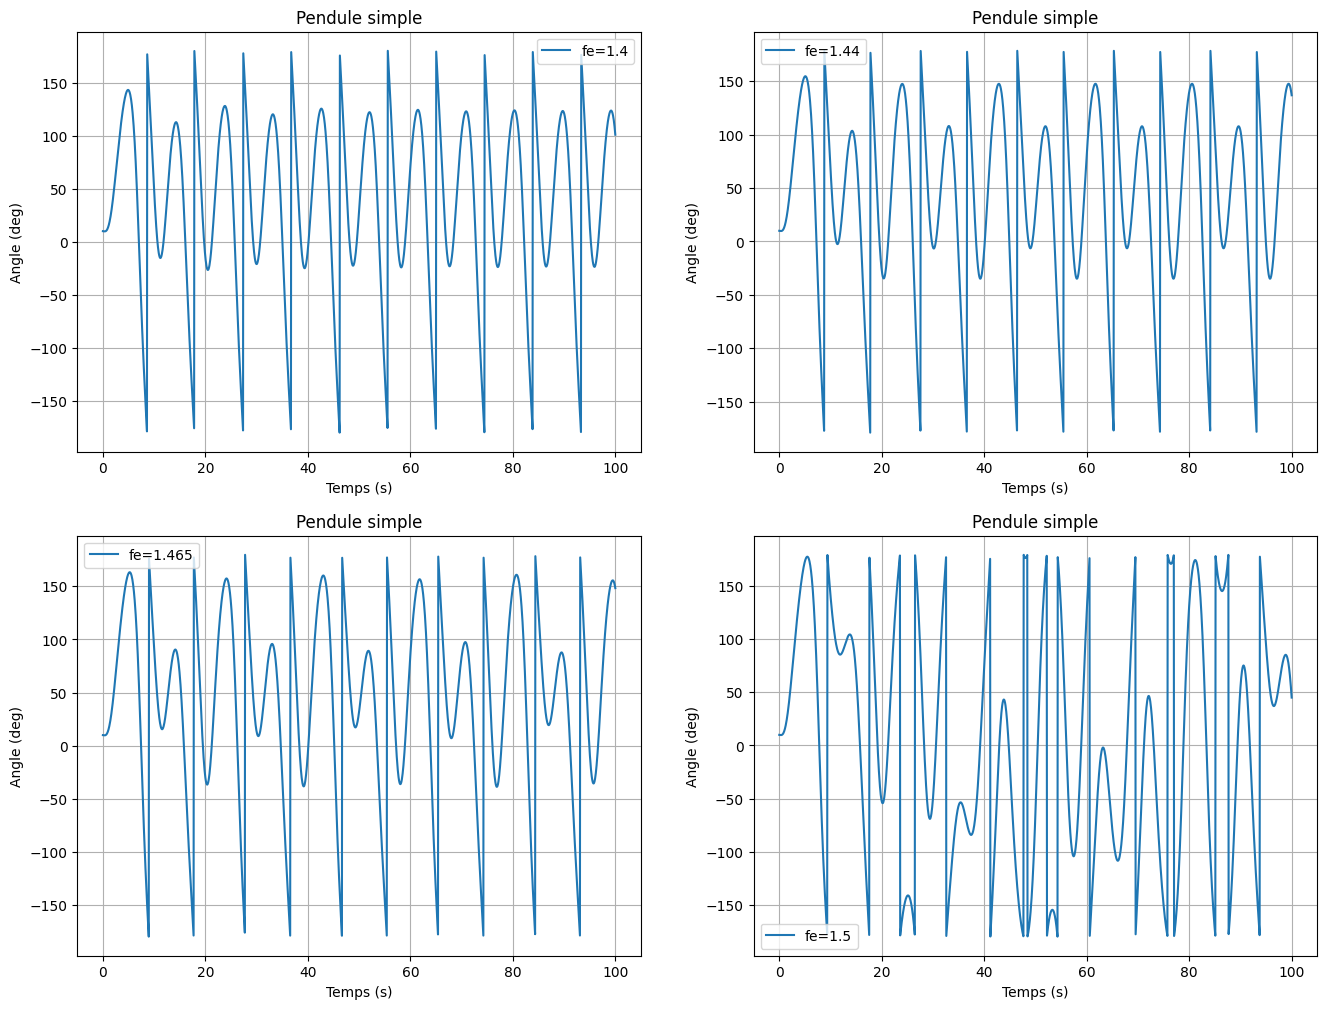

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, fe_ in enumerate([1.4, 1.44, 1.465, 1.5]):
    # Paramètres
    axe = axes[i // 2][i % 2]
    start = 0
    end = 100
    step = 0.05

    # Conditions initiales
    v_ini = (np.deg2rad(10), 0)
    global f_e
    f_e = fe_

    # Résolution du système d'équations différentielles
    t, v = euler(start, end, step, v_ini, system)

    # Affichage des résultats
    axe.plot(t, np.rad2deg(v[0]), label=f'fe={fe_}')
    axe.set_title('Pendule simple')
    axe.set_xlabel('Temps (s)')
    axe.set_ylabel('Angle (deg)')
    axe.legend()
    axe.grid()
plt.show()

La pariode des pendules avec $f_e<1.5$ est de 10s environ. Pour $f_e=1.5$ il est impossible de déterminer une période.

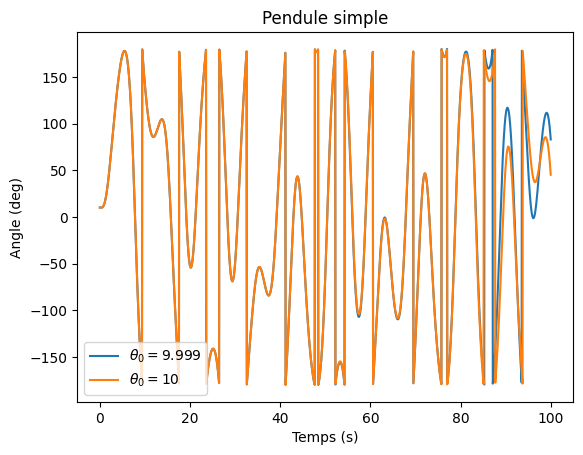

In [15]:
thetas = []
for v_ in [9.999, 10]:
    # Paramètres
    start = 0
    end = 100
    step = 0.05

    # Conditions initiales
    v_ini = (np.deg2rad(v_), 0)

    # Résolution du système d'équations différentielles
    t, v = euler(start, end, step, v_ini, system)
    thetas.append(v[0])
    global f_e
    f_e = 1.5

    # Affichage des résultats
    plt.plot(t, np.rad2deg(v[0]), label=fr"$\theta_0={v_}$")
    plt.title('Pendule simple')
    plt.xlabel('Temps (s)')
    plt.ylabel('Angle (deg)')
    plt.legend()
    plt.grid()
plt.show()

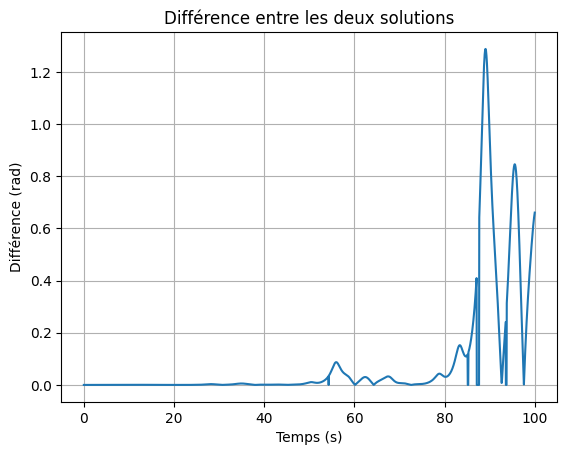

In [16]:
diff = np.abs(thetas[0] - thetas[1])
diff[diff > 3] = 0 # On ne prend pas en compte les valeurs aberrantes dû à la discontinuité
plt.plot(t, diff)
plt.title('Différence entre les deux solutions')
plt.xlabel('Temps (s)')
plt.ylabel('Différence (rad)')
plt.grid()
plt.show()

Après avoir ignorer les piques qui correspondents à des discontinuités dans la solution, on remarque que la différence entre les deux solutions augmente de plus en plus. Cela montre que le système est chaotique, car la différence entre les deux solutions varie grandement pour des conditions initiales très proches.